# Task 1
Consider the matrix H(v) = $1̂ − 2vv^T$ , where v is a unit column vector. What is the rank of the matrix
H(v)? Prove that it is orthogonal.

In [11]:
import numpy as np

m = 5 #assumption
v = np.random.randint(1, 10, size=m)
Hv = np.identity(m) - 2 * np.outer(v, v)
rank_Hv = np.linalg.matrix_rank(Hv)
print(Hv)
print("Rank of the matrix H(v) = ", rank_Hv)

orthogonal = np.allclose(np.dot(Hv.T, Hv), np.identity(m))  # to prove orthogonality, I need prove H(v)^T * H(v) = identity matrix

if orthogonal:
    print("H(v) is orthogonal")
else:
    print("H(v) is not orthogonal")

[[-17. -30.  -6. -30. -12.]
 [-30. -49. -10. -50. -20.]
 [ -6. -10.  -1. -10.  -4.]
 [-30. -50. -10. -49. -20.]
 [-12. -20.  -4. -20.  -7.]]
Rank of the matrix H(v) =  5
H(v) is not orthogonal


Commentary: 
1) The rank of a matrix is the maximum number of linearly independent rows or columns in that matrix. 
rank(1) = n (it has n linearly independent rows (and columns)). rank($2vv^T$) = 1(it can be expressed as a linear combination of its rows (or columns), and this means that all rows are linearly dependent) ==> rank of H(v) can be receive as the minimum rank of its individual ==> it can be equal 1. But since 1 ==> H(v) is a square matrix of dimension (n x n) ==> the rank of H(v) = n.



2) We can use the definition, that $H(v)H(v)^T=1$ ==> is H(v) orthogonal?: 

$H(v)^T = (1-2vv^T)^T$ ==> $H(v)^T = 1^T-(2vv^T)^T$ (since the transpose of the identity matrix is itself and the transpose of a scalar times a matrix is the scalar times the transpose of the matrix) ==> $H(v)^T = 1-2(vv^T)^T$ ==> $((vv^T)^T=v^T(v^T)^T=v^Tv)$ ==> $H(v)^T = 1-2v^Tv$ ==> {since v is a unit vector $v^Tv = 1$} ==> $H(v)^T=-1$. 

Let's calculate: $H(v)H(v)^T=(1-2vv^T)(-1)=-1+2vv^T$ ==> it is not orthogonal. Proven.

*where $vv^T$ is not the identity matrix. Just an example:
<pre>
|cosa||cosa sina| = |cos^2a cosasina| 
|sina|              |cosasina sin^2a|




# Task 2
Prove the following inequalities and provide examples of x and A when they turn into equalities:

$\lVert x \rVert_2 \leqslant \sqrt{m} \cdot \lVert x \rVert_{\infty}$

$\lVert A \rVert_{\infty} \leqslant \sqrt{n} \cdot \lVert A \rVert_2$,

where x is a vector of m components and A is m × n matrix.

In [8]:
import numpy as np

m = 4 # assumption
x = np.random.randint(1, 100, size=m) 
print("Vector x (m components):", x)

norm_2 = np.linalg.norm(x, 2)  # L2 norm
norm_inf = np.linalg.norm(x, np.inf)  # Linf norm

inequality_1 = norm_2 <= np.sqrt(m) * norm_inf
print("Inequalities 1 is ", inequality_1)
print()
print("--------")

n = 5 # assumption
random_matrix = np.random.randint(1, 100, size=(m, n))
print("Matrix A (mxn):", random_matrix)
print()

norm_2 = np.linalg.norm(random_matrix, 2)  # Frobenius norm
norm_inf = np.linalg.norm(random_matrix, np.inf)  # Linf norm

inequality_2 = norm_inf <= np.sqrt(n) * norm_2
print("Inequalities 2 is ", inequality_2)

Vector x (m components): [ 6 93 51 31]
Inequalities 1 is  True

--------
Matrix A (mxn): [[88 98 44 78  1]
 [45 91 92 62 47]
 [67 38 51  9 17]
 [78 39 28 26 94]]

Inequalities 2 is  True


Commentary:
\
Inequality 1 $\lVert x \rVert_2 \leqslant \sqrt{m} \cdot \lVert x \rVert_{\infty}$:
\
Let's square both sides: $(\lVert x \rVert_2)^2 \leqslant m \cdot (\lVert x \rVert_{\infty})^2$  [1], let's considering $\lVert x \rVert_{\infty}$ ==> any absolute number of x vector is always smaller or equal $\lVert x \rVert_{\infty}$: $|x_i| \leqslant \lVert x \rVert_{\infty} $ for all i.
\ 
Return to [1] and replace: $(x_1)^2+...+(x_m)^2) \leqslant m \cdot (\lVert x \rVert_{\infty})^2$, where every number on right side $\leqslant (\lVert x \rVert_{\infty})^2$. We have m components of vector x ==> we can write it as:
\
 $\sqrt{(x_1)^2+...+(x_m)^2} \leqslant \sqrt{m} \cdot \lVert x \rVert_{\infty}$ ==> $\lVert x \rVert_2 \leqslant \sqrt{m} \cdot \lVert x \rVert_{\infty}$. Proven.
 \
 Example: We can calculate it by hand or to use the routine above. Examples:
 
 1)  x = |1 2 3 4| ==> $\sqrt{1^2+2^2+3^2+4^2} \leqslant \sqrt{4} \cdot 4 $ ==> $5.47 \leqslant 8 $
 2)  x = |2 2 2 2 2| ==> $\sqrt{5 \cdot 2^2} \leqslant \sqrt{5} \cdot 2 $ ==> $4.47 = 4.47$
 \
 \
 Inequality 2 $\lVert A \rVert_{\infty} \leqslant \sqrt{n} \cdot \lVert A \rVert_{2}$:
 \
 <pre>
Take U = |1| ∈  R^n
              |.|
              |1|
 
$\lVert A \rVert_{\infty} = max_i(\sum_j |A_{ij|}) = \lVert AU \rVert_{\infty} \leqslant \lVert AU \rVert_2 $ 
\
$\lVert A \rVert_{\infty} \leqslant \lVert A \rVert_2 \lVert U \rVert_2$(cauchy schwarz inequalty) . For $ \lVert U \rVert_2 = \sqrt n$ (regarding on definition)

Than $\lVert A \rVert_{\infty} \leqslant \sqrt{n} \cdot \lVert A \rVert_{2}$ is proven.

# Task 3
Assuming u and v are m-vectors, consider the matrix $A = 1 + uv^T$ which is a rank-one perturbation
of identity. Can it be singular? Assuming it is not, compute its inverse. You may look for it in a form of
$A^{−1} = 1 + \alpha uv^T$ for some scalar $\alpha$ and evaluate $\alpha$.

In [29]:
import numpy as np

m = 4 # assumption
u = np.random.randint(1, 100, size=m)
print("u vector (m components):", u)
print()
v = np.random.randint(1, 100, size=m)
print("v vector (m components):", v)
print()

alpha = -1 / (1 + np.dot(u, v))
A_inverse = 1 + alpha * np.outer(u, v)

print("Alpha = ", alpha)
print("A^(-1): ", A_inverse)

u vector (m components): [31 27 71 62]

v vector (m components): [99 14 97 92]

Alpha =  -6.234802668495543e-05
A^(-1):  [[0.80865391 0.97294096 0.81251948 0.82218343]
 [0.83334372 0.97643245 0.83671052 0.8451275 ]
 [0.56175572 0.93802606 0.57060914 0.59274269]
 [0.61730781 0.94588191 0.62503897 0.64436686]]


Non-singular matrix A has an inverse. Than $A A^{-1} = A^{-1} A = 1$. Than $(1 + uv^T)(1 + \alpha uv^T)=1$. Expanding the product ==> $auv^T + uv^T + auv^Tuv^T = 0$. 
\
($uv^Tuv^T = u(v^Tu)v^T = (v^Tu)uv^T = $ {where $v^Tu$ is a result in a scalar} $ = cuv^T$)
\
Thus, $auv^T + uv^T + acuv^T = 0$ ==> $uv^T(a + 1 + ac) = 0$.  Since A is nonsingular, $uv^T$ cannot be equal to 0.
Therefore: $a + 1 + ac = 0$ ==> $a = -\frac{1}{1 + c} = -\frac{1}{1 + v^Tu}$, where $v^Tu\neq-1$

Can it be singular? A can be singular if det(A) = 0. 

# Task 4
Prove that for any unitary matrix U one has $\lVert UA \rVert_F = \lVert AU \rVert_F = \lVert A \rVert_F$

In [1]:
import numpy as np

# Since a unitary matrix is always square, take the A matrix:
A = np.array([[1, 2, 3], [3, 4, 5], [5, 6, 7]])
# The identity matrix of any size is a unitary matrix. For example:
U = np.identity(3)

norm_UA = np.linalg.norm(np.dot(U, A), 'fro')
norm_AU = np.linalg.norm(np.dot(A, U), 'fro')
norm_A = np.linalg.norm(A, 'fro')

print("Matrix A:", A)

print("Matrix U (unitary):", U)

print("Frobenius norm of UA:", norm_UA)
print("Frobenius norm of AU:", norm_AU)
print("Frobenius norm of A:", norm_A)

norm_U = np.linalg.norm(U, 'fro')
print(norm_U)

Matrix A: [[1 2 3]
 [3 4 5]
 [5 6 7]]
Matrix U (unitary): [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Frobenius norm of UA: 13.19090595827292
Frobenius norm of AU: 13.19090595827292
Frobenius norm of A: 13.19090595827292
1.7320508075688772


Commentary:
$$
\|UA\|_F = \sqrt{\sum_{i=1}^{m} \sum_{j=1}^{n} |UA_{ij}|^2}
$$
$$
\|AU\|_F = \sqrt{\sum_{i=1}^{m} \sum_{j=1}^{n} |AU_{ij}|^2}
$$
$$
\|A\|_F = \sqrt{Trace  (A^TA)} = \sqrt{\sum_{i} \sum_{j} (A^T)_{ij}A_{ji}} = \sqrt{\sum_{ij}(A^2)_{ij}} $$ (is true if A is square matrix)


For unitary matrices: $UU^T=U^TU=I$  



Write as: $$
(\|UA\|^2)_F = trace(UAA^TU^T) = trace(AA^T) = (\|A\|^2)_F ==> \|UA\|_F =\|A\|_F 
$$

$$
(\|AU\|^2)_F = trace(AUU^TA^T) = trace(AA^T) = (\|A\|^2)_F ==> \|AU\|_F =\|A\|_F 
$$

\
Proven.

# Task 5
In this exercise your goal will be to study and speed up an implementation of K-means algorithm. In the
notebook kmeans.ipynb, you can find a naive implementation. Explore the code, make sure you understand it.
You will find there two functions dist i and dist ij which are (on purpose) implemented in a rather inefficient
way. Improve them by getting rid of the loops in the favor of a proper numpy vectorized implementation and
measure the speed-up of the full algorithm for N = 10000.

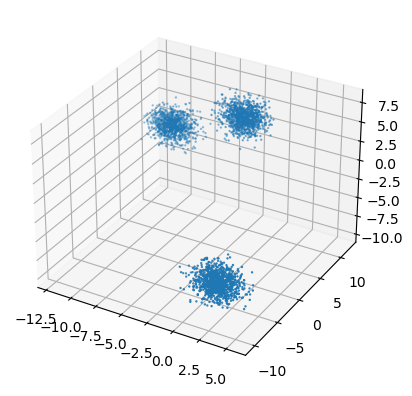

In [34]:
import numpy as np 
import matplotlib.pyplot as plt 
import timeit

def scatter_plot(data, col=None):
    from mpl_toolkits.mplot3d import Axes3D 
    %matplotlib inline
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:,0], data[:,1], data[:,2], s = 0.5, color=col)
    plt.show()
    
N = 1000
K = 3
d = 3
L = 10
# Generate some data
np.random.seed(42)
mu_true = np.random.uniform(-L, L, size = (K, d))
data = np.random.normal(mu_true, size = (N, K, d))
data = np.vstack(data)
np.random.shuffle(data)
if d == 3:
    scatter_plot(data, None)

In [35]:
mu = data[np.random.choice(range(data.shape[0]), K, replace=False)]
def dist_i(x, mu):
    # x: N datapoints, mu: N cluster centers
    # returns: D_{i}, squared distances from x[i] to mu[i]
    #dist = np.zeros(x.shape[0])
    #for i in range(x.shape[0]):
    #    dist[i] = np.sum((x[i] - mu[i])**2)
    #return dist
    
    
    #Using of vectorized implementation + a*a against a^2
    return np.sum((x - mu)*(x - mu), axis=1)

def dist_ij(x, mu):
    # x: N datapoints, mu: K cluster centers
    # returns: D_{ij}, squared distances from x[i] to mu[j]
    #dist = np.zeros((x.shape[0], mu.shape[0]))
    #for i in range(x.shape[0]):
    #    for j in range(mu.shape[0]):
    #        dist[i, j] += np.sum((x[i] - mu[j])**2)
    #return dist
    
    
    #Using of vectorized implementation + a*a against a^2
    return np.sum((x[:, np.newaxis, :] - mu)*(x[:, np.newaxis, :] - mu), axis=2)

ss_list = []
for n in range(10):
    c =  np.argmin(dist_ij(data, mu), axis = 1)    
     
    ss = np.mean(dist_i(data, mu[c]))
    

    
    
    ss_list.append(ss)    
    for i in range(K):
        cluster_members = data[c == i]
        cluster_members = cluster_members.mean(axis = 0)
        mu[i] = cluster_members
        

6.184100493555889e-05


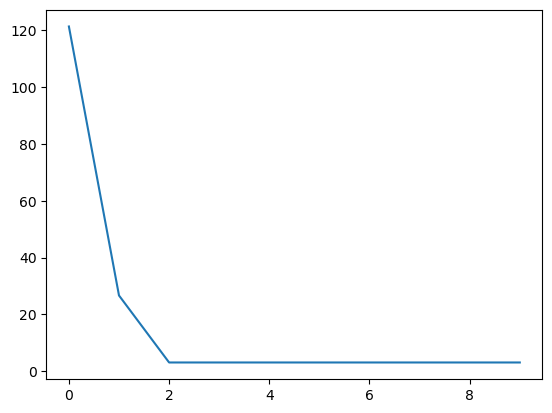

In [36]:
plt.plot(ss_list)
original_time = timeit.timeit("ss_list", setup="from __main__ import ss_list", number=10000)
print(original_time)

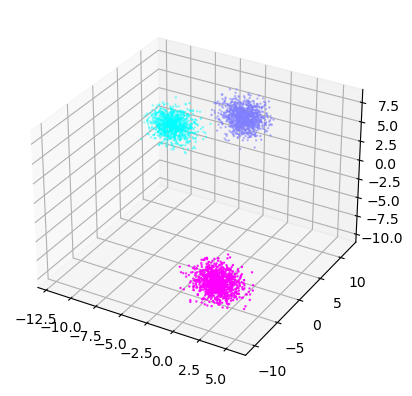

In [37]:
colors = np.array([plt.cm.cool(i/(K-1)) for i in range(K)])
if d == 3:
    scatter_plot(data, colors[c])

# Task 6
Some things just can not be vectorized but still can be speed up compared to naive implementation. For
example, consider computation of the Hofstadter-Conway sequence a(n) such that a(1) = 1, a(2) = 1 and
$a(n) = a(a(n − 1)) + a(n − a(n − 1)), n>2$.
\
Write three functions, computing the sequence up to n-th element in three ways: i) pre-allocating numpy array
and filling it using for loop, ii) cumulatively appending python list and converting it to numpy array, iii) same
as i) but compiled (jit) version. Time the resulting implementations and conclude which is preferable. With
the optimal one, compute $a(10^8)$.

In [10]:
import numpy as np
from numba import jit
import timeit

n = 10**8
# pre-allocating numpy array and filling it using for loop
def hofstadter_conway1(n):
    a = np.zeros(n, dtype=np.int64)
    a[0] = 1
    a[1] = 1
    for i in range(2, n):
        a[i] = a[a[i - 1]] + a[i - a[i - 1]]
    return a

# cumulatively appending python list and converting it to numpy array
def hofstadter_conway2(n):
    a = [1, 1]
    for i in range(2, n):
        a.append(a[a[i - 1]] + a[i - a[i - 1]])
    return np.array(a)

# same as i) but compiled (jit) version
@jit(nopython=True)
def hofstadter_conway3(n):
    a = np.zeros(n, dtype=np.int64)
    a[0] = 1
    a[1] = 1
    for i in range(1, n):
        a[i] = a[a[i - 1]] + a[i - a[i - 1]]
    return a


time1 = timeit.timeit(lambda: hofstadter_conway1(n), number=1)
print("pre-allocating numpy array and filling it using for loop: ", round(time1, 4), " s")

# Time approach 2
time2 = timeit.timeit(lambda: hofstadter_conway2(n), number=1)
print("cumulatively appending python list and converting it to numpy array: ", round(time2, 4), " s")

time3 = timeit.timeit(lambda: hofstadter_conway3(n), number=1)
print("same as i) but compiled (jit) version: ", round(time3, 4), " s")

pre-allocating numpy array and filling it using for loop:  44.7356  s
cumulatively appending python list and converting it to numpy array:  13.8593  s
same as i) but compiled (jit) version:  1.0113  s


# Task 7
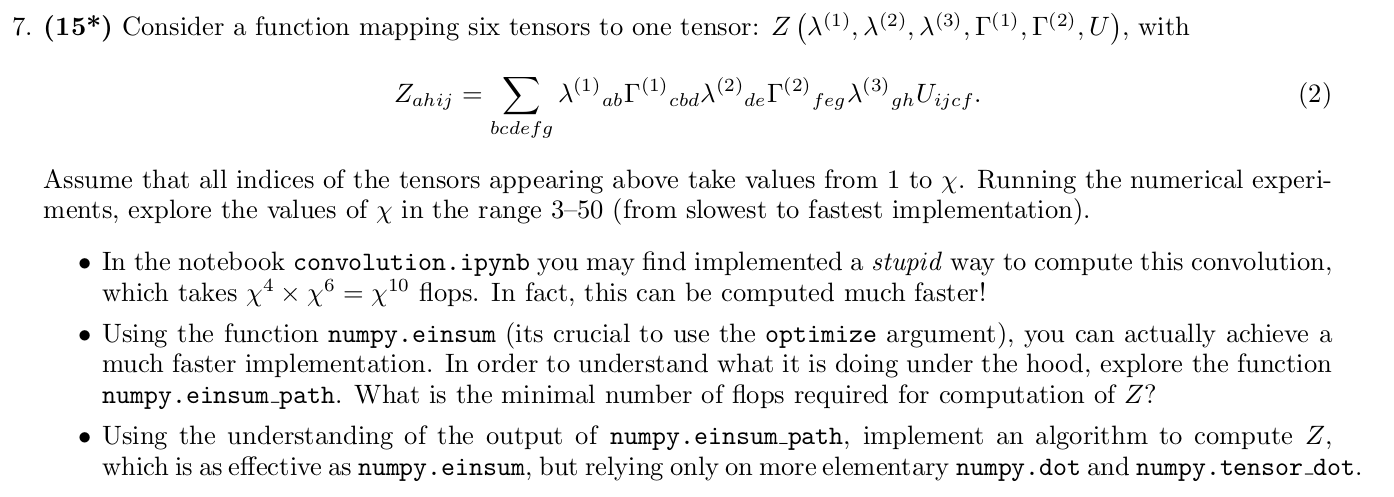

In [12]:
import numpy as np
import itertools
import timeit

c = 3
# Generate some data
np.random.seed(42)
lambda1 = np.random.normal(size=(c, c))
lambda2 = np.random.normal(size=(c, c))
lambda3 = np.random.normal(size=(c, c))
G1 = np.random.normal(size=(c, c, c))
G2 = np.random.normal(size=(c, c, c))
U = np.random.normal(size=(c, c, c, c))

def Z_naive(lambda1, lambda2, lambda3, G1, G2, U):
    c = lambda1.shape[0]
    Z = np.zeros(shape=(c, c, c, c))
    for a, b, c, d, e, f, g, h, i, j in itertools.product(*([range(c)]*10)):
        Z[a, h, i, j] += lambda1[a, b]*lambda2[d, e]*lambda3[g, h]*G1[c, b, d]*G2[f, e, g]*U[i, j, c, f]
    return Z

Z = Z_naive(lambda1, lambda2, lambda3, G1, G2, U)
print(Z.shape)
time_taken_Z = timeit.timeit(lambda: Z, number=1)
print(time_taken_Z, "s per loop for naive implementation")


χ_values = range(3, 51)

def einsum_func(lambda1, lambda2, lambda3, G1, G2, U):
    Z = np.einsum('ab,de,gh,cbd,feg,ijcf->ahij', lambda1, lambda2, lambda3, G1, G2, U, optimize=True)
    return Z

Zein = einsum_func(lambda1, lambda2, lambda3, G1, G2, U)
time_taken_Z_einsum = timeit.timeit(lambda: Zein, number=1)
print(time_taken_Z_einsum, "s per loop for np.einsum")
print()
print(Zein.shape)


for χ in χ_values:
    lambda1 = np.random.normal(size=(χ, χ))
    lambda2 = np.random.normal(size=(χ, χ))
    lambda3 = np.random.normal(size=(χ, χ))
    G1 = np.random.normal(size=(χ, χ, χ))
    G2 = np.random.normal(size=(χ, χ, χ))
    U = np.random.normal(size=(χ, χ, χ, χ))

    time_taken = timeit.timeit(lambda: einsum_func(lambda1, lambda2, lambda3, G1, G2, U), number=1)

path, flops = np.einsum_path('ab,de,gh,cbd,feg,ijcf->ahij', lambda1, lambda2, lambda3, G1, G2, U, optimize=True)
print(flops)
####However, Flop count is too large for tensor contraction using np.einsum_path

def custom_einsum(lambda1, lambda2, lambda3, G1, G2, U):
    var1 = np.dot(lambda1, lambda2)
    var2 = np.dot(var1, lambda3)
    var3 = np.tensordot(G1, G2, axes=([2], [2]))
    var4 = np.tensordot(var3, U, axes=([1, 3], [2, 3]))
    Z = np.tensordot(var2, var4, axes=([0, 1], [0, 1]))
    return Z


Z_custom = custom_einsum(lambda1, lambda2, lambda3, G1, G2, U)
print(Z_custom)
print(Z_custom.shape)
time_taken_custom = timeit.timeit(lambda: custom_einsum(lambda1, lambda2, lambda3, G1, G2, U), number=1)
print(time_taken_custom, "s per loop for np.dot/np.tensordot")

(3, 3, 3, 3)
4.68700091005303e-06 s per loop for naive implementation
2.697001036722213e-06 s per loop for np.einsum

(3, 3, 3, 3)
  Complete contraction:  ab,de,gh,cbd,feg,ijcf->ahij
         Naive scaling:  10
     Optimized scaling:  6
      Naive FLOP count:  5.859e+17
  Optimized FLOP count:  3.191e+10
   Theoretical speedup:  18360752.056
  Largest intermediate:  6.250e+06 elements
--------------------------------------------------------------------------
scaling                  current                                remaining
--------------------------------------------------------------------------
   4                 cbd,ab->acd                 de,gh,feg,ijcf,acd->ahij
   4                 feg,de->dfg                    gh,ijcf,acd,dfg->ahij
   4                 dfg,gh->dfh                       ijcf,acd,dfh->ahij
   5               dfh,acd->acfh                          ijcf,acfh->ahij
   6             acfh,ijcf->ahij                               ahij->ahij
[[  115063.6292